# Data inspection and preprocessing - 1, Data inspection
Code is meant to be **read**! Respect [PEP 8](https://peps.python.org/pep-0008/)!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat

In [2]:
data = loadmat("data\\S1_A1_E1.mat")
data

emg_data = data["emg"]
stimulus = data["stimulus"]
repetition = data["repetition"]

n_channels = emg_data.shape[1]

In [3]:
print("Shape of emg_data: ", emg_data.shape)
print("Shape of stimulus: ", stimulus.shape)
print("Shape of repetition: ", repetition.shape)
print()
print("Number of time points: ", emg_data.shape[0])
print("Number of EMG channels: ", n_channels)
print()
print("Sampling frequency: 100 Hz (from data description)")

Shape of emg_data:  (101014, 10)
Shape of stimulus:  (101014, 1)
Shape of repetition:  (101014, 1)

Number of time points:  101014
Number of EMG channels:  10

Sampling frequency: 100 Hz (from data description)


In [4]:
stim_rep_stacked = np.hstack((stimulus, repetition))
stim_rep_unique = np.unique(stim_rep_stacked, axis=0)
stim_rep_unique

array([[ 0,  0],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 4,  1],
       [ 4,  2],
       [ 4,  3],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10],
       [ 5,  1],
       [ 5,  2],
       [ 5,  3],
       [ 5,  4],
       [ 5,  5],
       [ 5,  6],
       [ 5,  7],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10],
       [ 6,  1],
       [ 6,  2],
       [ 6,  3],
       [ 6,  4],
       [ 6,  5],
       [ 6,  6],
       [ 6,  7],
       [ 6,  8

In [5]:
n_stimuli = int(np.unique(stimulus).size - 1)  # remove rest
n_repetitions = int(np.unique(repetition).size - 1)  # remove rest

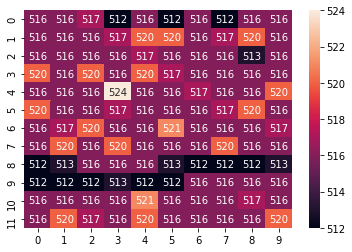

In [6]:
emg_dur = np.zeros((n_stimuli, n_repetitions), int)
for i in range(n_stimuli):
    for j in range(n_repetitions):
        sel = np.squeeze(np.logical_and(stimulus == (i + 1), repetition == (j + 1)))
        emg_dur[i, j] = emg_data[sel, :].shape[0]
        
fig, ax = plt.subplots()
sns.heatmap(data=emg_dur, ax=ax, annot=True, fmt="d")

In [7]:
n_tsteps = np.min(emg_dur)
n_epochs = n_stimuli * n_repetitions

emg_tensor = np.zeros((n_stimuli, n_repetitions, n_tsteps, n_channels))

for i in range(n_stimuli):
    for j in range(n_repetitions):
        sel = np.squeeze(np.logical_and(stimulus == (i + 1), repetition == (j + 1)))
        emg_selected_data = emg_data[sel, :]
        emg_tensor[i, j, :, :] = emg_selected_data[:n_tsteps, :]

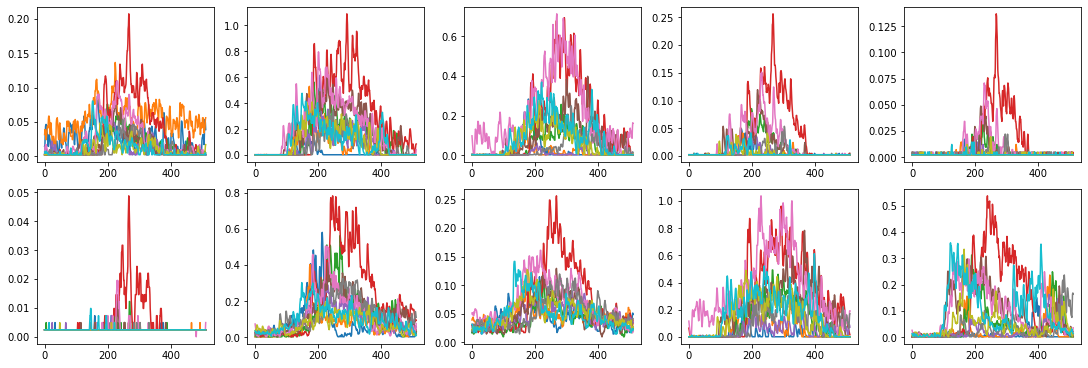

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5), constrained_layout=True)
ax = ax.ravel()
for j in range(n_channels):
    for k in range(n_repetitions):
        ax[j].plot(emg_tensor[0, k, :, j])

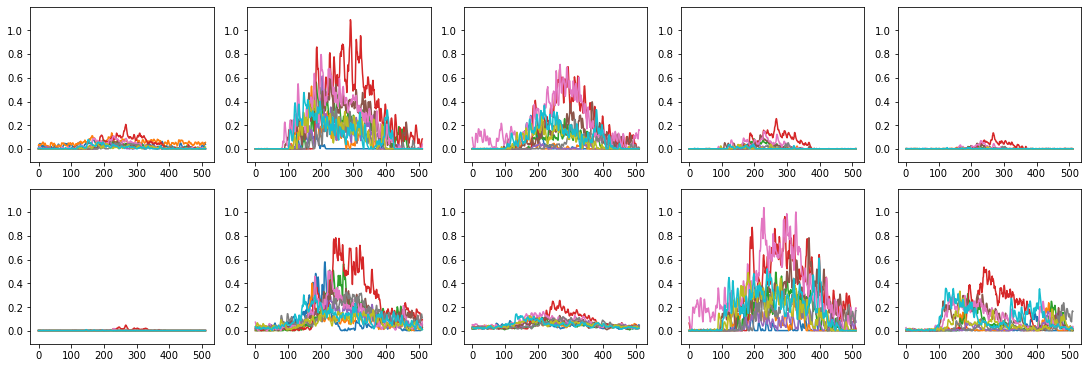

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5), constrained_layout=True)
ax = ax.ravel()
data_max = np.max(emg_tensor[0, :, :, :])
data_range = data_max
for j in range(n_channels):
    for k in range(n_repetitions):
        ax[j].plot(emg_tensor[0, k, :, j])
    ax[j].set_ylim([0 - data_range / 10, data_max + data_range / 10])

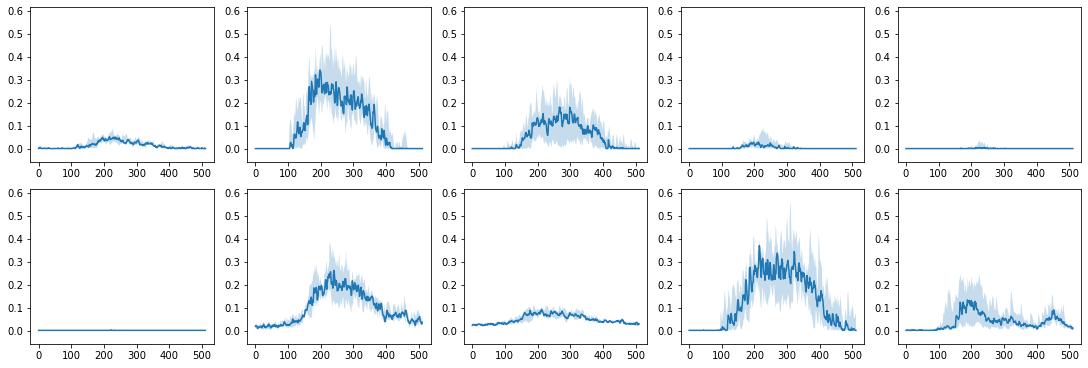

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5), constrained_layout=True)
ax = ax.ravel()

average_response = np.median(emg_tensor[0, :, :, :], axis=0)
q1_response = np.quantile(emg_tensor[0, :, :, :], q=0.25, axis=0)
q3_response = np.quantile(emg_tensor[0, :, :, :], q=0.75, axis=0)

data_max = np.max(q3_response)
data_range = data_max

for j in range(n_channels):
    ax[j].fill_between(np.arange(n_tsteps), q1_response[:, j], q3_response[:, j], alpha=0.25)
    ax[j].plot(average_response[:, j])
    ax[j].set_ylim([0 - data_range / 10, data_max + data_range / 10])

Text(33.0, 0.5, 'Repetition ID [1]')

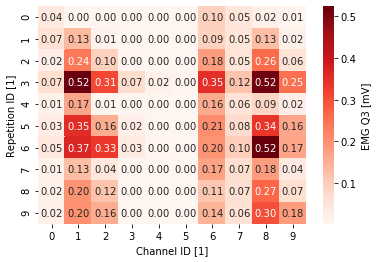

In [11]:
q3_response = np.quantile(emg_tensor[0, :, :, :], q=0.75, axis=1)

fig, ax = plt.subplots()
sns.heatmap(q3_response, fmt=".2f", annot=True, cmap="Reds", ax=ax, cbar_kws=dict(label="EMG Q3 [mV]"))
ax.set_xlabel("Channel ID [1]")
ax.set_ylabel("Repetition ID [1]")

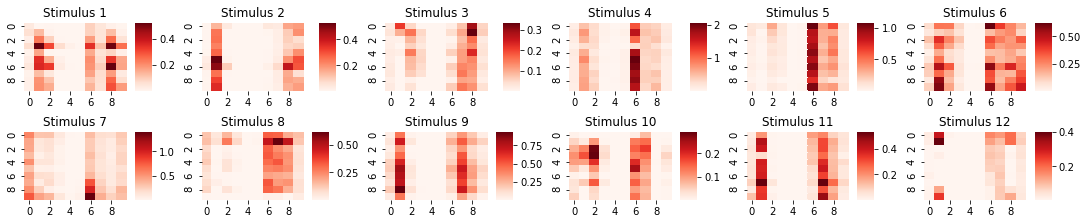

In [12]:
fig, ax = plt.subplots(2, 6, figsize=(15, 3), constrained_layout=True)
ax = ax.ravel()

for i in range(n_stimuli):
    q3_response = np.quantile(emg_tensor[i, :, :, :], q=0.75, axis=1)
    sns.heatmap(q3_response, cmap="Reds", ax=ax[i])
    ax[i].title.set_text("Stimulus " + str(i + 1))

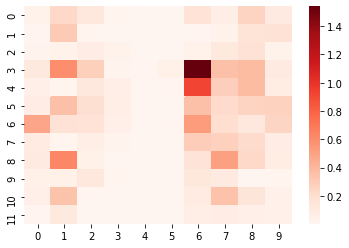

In [13]:
fig, ax = plt.subplots()
which_channel_is_on = np.zeros((n_stimuli, n_channels))
for i in range(n_stimuli):
    q3_response = np.quantile(emg_tensor[i, :, :, :], q=0.75, axis=1)
    which_channel_is_on[i, :] = np.mean(q3_response, axis=0) 

sns.heatmap(which_channel_is_on, cmap="Reds", ax=ax)

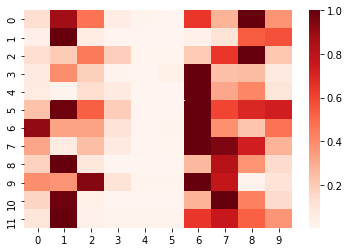

In [14]:
fig, ax = plt.subplots()
which_channel_is_on_norm = np.zeros((n_stimuli, n_channels))
for i in range(n_stimuli):
    which_channel_is_on_norm[i, :] = which_channel_is_on[i, :] / np.max(which_channel_is_on[i, :])

sns.heatmap(which_channel_is_on_norm, cmap="Reds", ax=ax)